In [1]:
%matplotlib inline

import re
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import jieba
import jieba.posseg as pseg



In [2]:
csv_path = '/home/jovyan/AIA_project/spider/news'
csv_list = os.listdir(csv_path)
df = pd.DataFrame()
for f in csv_list:
    if f !='.ipynb_checkpoints':
        class_no = f.split('_')[0]
        csv_data = pd.read_csv(csv_path+'/'+f)[['url','eigenWords','topKeyWords','content','title']]
        csv_data['class_no'] = int(class_no)
        df = pd.concat([df, csv_data], axis=0, ignore_index=True)

In [3]:
df.shape

(102625, 6)

In [4]:
df.head()

,url,eigenWords,topKeyWords,content,title,class_no
0,http://30plus.30.com.tw/article-content_1864.h...,"['全球', '快時', '流行', 'zara', '建立', '奧德嘉', '時尚', ...","['amancio', 'amancio ortega', 'arteixo', 'bear...",全球股市瞬息萬變的浮沈起落讓西班牙印地紡集團（Inditex）總裁阿曼西歐．奧德嘉（Aman...,快時尚漫步全球！ZARA如何建立自己的流行帝國？ - 【30雜誌】30+BLOG,0
1,http://amy010203.pixnet.net/blog/post/345555785,"['顏炳立', '房市', '落底', '回彈', '逐步', '土地', '市場', '北...","['amy010203', 'udn', '一年', '估計', '價再降', '北市', ...",戴德梁行董事總經理顏炳立認為，2018年房市還不會落底，估計2019年落底後再盤整4年，整體...,顏炳立：房市明年落底 2023年逐步回彈 @ 房產大明星 :: 痞客邦 ::,0
2,http://artemperor.tw/focus/1883,"['前澤友作', '藝術網', '非池中', '年度', '藝術界', '人物', '收藏'...","['amedeo modigniani', 'andy warhol', 'art', 'b...",非池中藝術網管理後台｜會員登入｜2017年度藝術界風雲人物－－前澤友作國內要聞2017-12...,2017年度藝術界風雲人物－－前澤友作 - 非池中藝術網,0
3,http://artemperor.tw/focus/1897,"['藝術', '上海', '市場', '藝術網', '非池中', '拓展', '策略', '...","['arts', 'columnist', 'deer系列', 'joseph nicéph...",非池中藝術網管理後台｜會員登入｜日韓畫廊在上海藝術市場的拓展策略國際特派觀察家2018-01...,日韓畫廊在上海藝術市場的拓展策略 - 非池中藝術網,0
4,http://artemperor.tw/focus/1909,"['大千', '卡索', '如何', '一位', '國畫', '大師', '非池中', '土...","['joseph nicéphore nièpce', 'latest news', 'ne...",非池中藝術網管理後台｜會員登入｜張大千《一位國畫大師如何追上畢卡索》藝術市場2018-01-...,張大千《一位國畫大師如何追上畢卡索》 - 非池中藝術網,0


In [5]:
type_dict = {
    0: '財經',
    1: '房地產',
    2: '理財', 
    3: '旅遊',
    4: '美食',
    5: '美妝保養',
    6: '蘋果專區',
    7: '汽車',
    8: '區塊鍊', 
    9: '醫療健康',
    10: '職涯',
    11: 'AI與大數據',
    12:'無人駕駛',
    13:'3C產品'
}

In [4]:
e_type_dict = {
    0: 'finance',
    1: 'house',
    2: 'money', 
    3: 'travel',
    4: 'food',
    5: 'cosmetic',
    6: 'apple',
    7: 'car',
    8: 'blockchain', 
    9: 'health',
    10: 'job',
    11: 'AI',
    12:'drone',
    13:'3C'
}

In [2]:
df_u = pd.read_csv('data/data_uniqcontent.csv')

In [8]:
df_u.shape

(81651, 9)

In [5]:
stat_dfu = df_u.groupby('class_no',as_index=False).count()
stat_dfu['class_name'] = stat_dfu['class_no'].map(e_type_dict)

In [7]:
stat_dfu[['class_name','url']]

,class_name,url
0,finance,7799
1,house,3710
2,money,5639
3,travel,5320
4,food,5167
5,cosmetic,4918
6,apple,8724
7,car,9174
8,blockchain,3725
9,health,9128


In [7]:
stat_df = df.groupby('class_no',as_index=False).count()

In [8]:
stat_df['class_name'] = stat_df['class_no'].map(e_type_dict)

In [9]:
stat_df

,class_no,url,eigenWords,topKeyWords,content,title,class_name
0,0,10024,10024,10024,10014,10024,finance
1,1,3951,3929,3951,3951,3951,house
2,2,7480,7468,7480,7477,7480,money
3,3,10021,10021,10021,9983,10021,travel
4,4,10000,10000,10000,9984,10000,food
5,5,5272,5255,5270,5269,5270,cosmetic
6,6,10000,10000,10000,9997,10000,apple
7,7,10005,10005,10005,10001,10005,car
8,8,4735,4733,4735,4732,4735,blockchain
9,9,10016,10016,10016,10006,10016,health


In [11]:
df_v2 = pd.read_csv('/home/jovyan/jt071-group23/jt071073/jt071073/data/for_CNN_data(73081).csv')

In [13]:
stat_df_v2 = df_v2.groupby('label',as_index=False).count()

In [15]:
e_type_dict_v2 = {
    0: 'apple',
    1: 'AI',
    2: 'car', 
    3: 'finance',
    4: 'travel',
    5: 'cosmetic',
    6: '3C',
    7: 'health',
    8: 'job', 
    9: 'food',
    10: 'money',
    11: 'drone',
    12:'house',
    13:'blockchain'
}

In [16]:
stat_df_v2['class_name'] = stat_df_v2['label'].map(e_type_dict_v2)

In [25]:
stat_df_merge = pd.merge(stat_df, stat_df_v2, on='class_name')

In [26]:
stat_df_merge

,class_no,url,eigenWords,topKeyWords,content_x,title,class_name,label,content_y,sentences,sentences_1000,sentences_1000_str
0,0,10024,10024,10024,10014,10024,finance,3,6974,6974,6974,6974
1,1,3951,3929,3951,3951,3951,house,12,3506,3506,3506,3506
2,2,7480,7468,7480,7477,7480,money,10,4644,4644,4644,4644
3,3,10021,10021,10021,9983,10021,travel,4,5150,5150,5150,5149
4,4,10000,10000,10000,9984,10000,food,9,4657,4657,4657,4657
5,5,5272,5255,5270,5269,5270,cosmetic,5,4675,4675,4675,4675
6,6,10000,10000,10000,9997,10000,apple,0,7562,7562,7562,7562
7,7,10005,10005,10005,10001,10005,car,2,8425,8429,8429,8425
8,8,4735,4733,4735,4732,4735,blockchain,13,2932,2932,2932,2932
9,9,10016,10016,10016,10006,10016,health,7,8443,8443,8443,8443


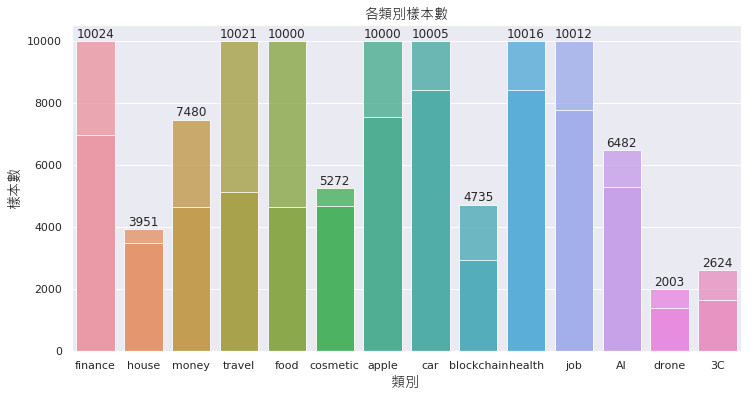

In [45]:
from matplotlib.font_manager import FontProperties

myfont=FontProperties(fname=r'/home/jovyan/AIA_project/jt071073/data/msjh.ttf',size=14)
plt.rcParams['font.sans-serif'] = myfont.get_family() 
sns.set(font=myfont.get_family())
plt.figure(figsize=(12,6))
ax= sns.barplot(stat_df_merge['class_name'], stat_df_merge['url'], alpha=0.8)
ax2= sns.barplot(stat_df_merge['class_name'], stat_df_merge['sentences'], alpha=0.8)
plt.title("各類別樣本數", fontsize=12, fontproperties=myfont)
plt.ylabel('樣本數', fontsize=12, fontproperties=myfont)
plt.xlabel('類別 ', fontsize=12, fontproperties=myfont)

rects = ax.patches
rects2 = ax2.patches

labels = stat_df_merge['url']
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
    
plt.show()

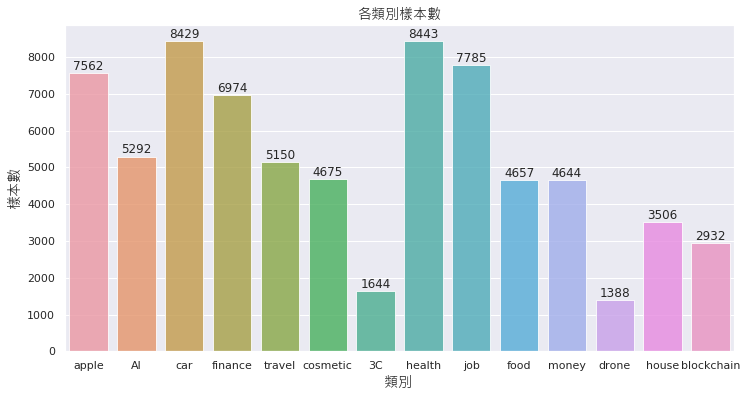

In [21]:
from matplotlib.font_manager import FontProperties

myfont=FontProperties(fname=r'/home/jovyan/AIA_project/jt071073/data/msjh.ttf',size=14)
plt.rcParams['font.sans-serif'] = myfont.get_family() 
sns.set(font=myfont.get_family())
plt.figure(figsize=(12,6))
ax= sns.barplot(stat_df_v2['class_name'], stat_df_v2['sentences'], alpha=0.8)

plt.title("各類別樣本數", fontsize=12, fontproperties=myfont)
plt.ylabel('樣本數', fontsize=12, fontproperties=myfont)
plt.xlabel('類別 ', fontsize=12, fontproperties=myfont)

rects = ax.patches
labels = stat_df_v2['sentences']
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()